<a href="https://colab.research.google.com/github/nitishragu12/Major-Project---Covid/blob/main/Forecasting_of_Corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Forecasting regarding Corona virus

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as p
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import folium
 
%matplotlib inline
 
import warnings
warnings.filterwarnings('ignore')

### Gathering of data

In [ ]:
df = pd.read_csv('/content/owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81437 entries, 0 to 81436
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               81437 non-null  object 
 1   continent                              77479 non-null  object 
 2   location                               81437 non-null  object 
 3   date                                   81437 non-null  object 
 4   total_cases                            79689 non-null  float64
 5   new_cases                              79687 non-null  float64
 6   new_cases_smoothed                     78686 non-null  float64
 7   total_deaths                           70168 non-null  float64
 8   new_deaths                             70326 non-null  float64
 9   new_deaths_smoothed                    78686 non-null  float64
 10  total_cases_per_million                79257 non-null  float64
 11  ne

In [ ]:
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [ ]:
df.shape

(81437, 59)

In [ ]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
81432,ZWE,Africa,Zimbabwe,2021-04-09,37147.0,95.0,34.857,1535.0,3.0,1.571,2499.306,6.392,2.345,103.277,0.202,0.106,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2407.0,453512.0,30.513,0.162,1789.0,0.120,0.019,51.3,tests performed,206205.0,178237.0,27968.0,12528.0,11636.0,1.39,1.20,0.19,783.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
81433,ZWE,Africa,Zimbabwe,2021-04-10,37273.0,126.0,51.714,1538.0,3.0,2.000,2507.783,8.477,3.479,103.479,0.202,0.135,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2167.0,455679.0,30.659,0.146,1944.0,0.131,0.027,37.6,tests performed,222733.0,193936.0,28797.0,16528.0,12831.0,1.50,1.30,0.19,863.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
81434,ZWE,Africa,Zimbabwe,2021-04-11,37288.0,15.0,52.143,1538.0,0.0,1.857,2508.793,1.009,3.508,103.479,0.000,0.125,1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1257.0,456936.0,30.743,0.085,1964.0,0.132,0.027,37.7,tests performed,223492.0,194594.0,28898.0,759.0,12085.0,1.50,1.31,0.19,813.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
81435,ZWE,Africa,Zimbabwe,2021-04-12,37307.0,19.0,53.286,1542.0,4.0,2.429,2510.071,1.278,3.585,103.748,0.269,0.163,1.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111.0,458047.0,30.818,0.075,1955.0,0.132,0.027,36.7,tests performed,234579.0,205275.0,29304.0,11087.0,12724.0,1.58,1.38,0.20,856.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
81436,ZWE,Africa,Zimbabwe,2021-04-13,37330.0,23.0,52.000,1543.0,1.0,1.714,2511.618,1.547,3.499,103.815,0.067,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [ ]:
df.isnull().sum()

iso_code                                     0
continent                                 3958
location                                     0
date                                         0
total_cases                               1748
new_cases                                 1750
new_cases_smoothed                        2751
total_deaths                             11269
new_deaths                               11111
new_deaths_smoothed                       2751
total_cases_per_million                   2180
new_cases_per_million                     2182
new_cases_smoothed_per_million            3178
total_deaths_per_million                 11688
new_deaths_per_million                   11530
new_deaths_smoothed_per_million           3178
reproduction_rate                        15589
icu_patients                             72981
icu_patients_per_million                 72981
hosp_patients                            71310
hosp_patients_per_million                71310
weekly_icu_ad

In [ ]:
df['tests_units'].nunique()

4

In [ ]:
df['tests_units'].value_counts()

tests performed    27261
people tested       8222
samples tested      7721
units unclear        847
Name: tests_units, dtype: int64

In [ ]:
#to check the unique values in data set
df.apply(lambda x: len(x.unique()))

iso_code                                   215
continent                                    7
location                                   215
date                                       469
total_cases                              42789
new_cases                                11148
new_cases_smoothed                       21219
total_deaths                             16272
new_deaths                                2658
new_deaths_smoothed                       5936
total_cases_per_million                  61488
new_cases_per_million                    35197
new_cases_smoothed_per_million           39644
total_deaths_per_million                 37782
new_deaths_per_million                    6834
new_deaths_smoothed_per_million           8148
reproduction_rate                          368
icu_patients                              2244
icu_patients_per_million                  4701
hosp_patients                             4354
hosp_patients_per_million                 7622
weekly_icu_ad

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.968900e+04,79687.000000,78686.000000,7.016800e+04,70326.000000,78686.000000,79257.000000,79255.000000,78259.000000,69749.000000,69907.000000,78259.000000,65848.000000,8456.000000,8456.000000,10127.000000,10127.000000,743.000000,743.000000,1240.000000,1240.000000,3.729100e+04,3.701200e+04,37012.000000,37291.000000,4.264400e+04,42644.000000,41307.000000,40689.000000,7.313000e+03,6.636000e+03,4.759000e+03,6.182000e+03,1.175000e+04,7313.000000,6636.000000,4759.000000,11750.000000,69577.000000,8.093400e+04,75881.000000,73524.000000,72682.000000,73111.000000,73839.000000,50339.000000,74470.000000,75473.000000,58402.000000,57540.000000,37392.000000,68013.000000,77312.000000,74368.000000
mean,7.610389e+05,5502.937556,5486.493687,2.166830e+04,135.462333,119.666347,9212.036330,72.130123,72.029677,209.241327,1.469092,1.294608,1.021955,1032.227412,24.683618,4765.028241,165.613372,271.228685,20.480506,3935.503165,113.637663,4.130950e+04,5.460856e+06,204.470906,1.757996,3.953518e+04,1.662879,0.088217,161.378638,1.160714e+07,7.597813e+06,3.780746e+06,3.908464e+05,2.053391e+05,10.989837,7.842688,4.261227,2625.268596,58.751708,1.292772e+08,343.873277,30.529526,8.779104,5.562041,19137.364017,13.320237,257.556833,7.808455,10.527234,32.655363,50.944095,3.031211,73.160129,0.727388
std,5.286863e+06,33914.627068,33353.292228,1.277265e+05,738.650644,675.063277,17843.101079,174.655870,147.720313,368.604780,3.953907,2.885114,0.360267,3024.061648,27.082366,12539.248661,206.906237,570.645988,36.851142,11724.177615,232.836546,1.554507e+05,2.503250e+07,439.830933,5.351840,1.423888e+05,4.277444,0.097631,877.800528,4.992293e+07,2.973702e+07,1.369815e+07,1.517282e+06,1.007488e+06,19.626696,12.574472,8.904495,4812.137172,21.785696,6.928738e+08,1676.126106,9.113763,6.229082,4.253330,19791.531969,19.932094,118.681439,3.962361,10.402283,13.474885,31.764744,2.464639,7.551056,0.150074
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,-2.928600e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,8.610000e+02,2.000000,6.571000,4.200000e+01,0.000000,0.000000,184.566000,0.171000,1.100000,6.396000,0.000000,0.000000,0.860000,24.000000,3.675000,99.000000,20.794000,7.896500,1.678000,53.242250,9.064750,1.386000e+03,1.147215e+05,10.381500,0.119000,1.411000e+03,0.117000,0.016000,7.800000,5.747400e+04,5.171125e+04,2.676550e+04,3.540250e+03,9.780000e+02,0.820000,0.707500,0.360000,306.000000,44.440000,2.540916e+06,36.25

### Cleaning of Data

In [ ]:
df.isnull().sum()

iso_code                                     0
continent                                 3958
location                                     0
date                                         0
total_cases                               1748
new_cases                                 1750
new_cases_smoothed                        2751
total_deaths                             11269
new_deaths                               11111
new_deaths_smoothed                       2751
total_cases_per_million                   2180
new_cases_per_million                     2182
new_cases_smoothed_per_million            3178
total_deaths_per_million                 11688
new_deaths_per_million                   11530
new_deaths_smoothed_per_million           3178
reproduction_rate                        15589
icu_patients                             72981
icu_patients_per_million                 72981
hosp_patients                            71310
hosp_patients_per_million                71310
weekly_icu_ad

In [ ]:
#to remove unnecessory columns
col = ['icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million',
        'weekly_hosp_admissions','weekly_hosp_admissions_per_million','new_tests','total_tests','total_tests_per_thousand','new_tests_per_thousand',
       'new_tests_smoothed','new_tests_smoothed_per_thousand','positive_rate','tests_per_case','tests_units','total_vaccinations','people_vaccinated',
       'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','extreme_poverty','handwashing_facilities',                             
       'people_fully_vaccinated','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred'
       ]
df = df.drop(columns=col, axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81437 entries, 0 to 81436
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         81437 non-null  object 
 1   continent                        77479 non-null  object 
 2   location                         81437 non-null  object 
 3   date                             81437 non-null  object 
 4   total_cases                      79689 non-null  float64
 5   new_cases                        79687 non-null  float64
 6   new_cases_smoothed               78686 non-null  float64
 7   total_deaths                     70168 non-null  float64
 8   new_deaths                       70326 non-null  float64
 9   new_deaths_smoothed              78686 non-null  float64
 10  total_cases_per_million          79257 non-null  float64
 11  new_cases_per_million            79255 non-null  float64
 12  new_cases_smoothed

In [ ]:
df.isnull().sum()

iso_code                               0
continent                           3958
location                               0
date                                   0
total_cases                         1748
new_cases                           1750
new_cases_smoothed                  2751
total_deaths                       11269
new_deaths                         11111
new_deaths_smoothed                 2751
total_cases_per_million             2180
new_cases_per_million               2182
new_cases_smoothed_per_million      3178
total_deaths_per_million           11688
new_deaths_per_million             11530
new_deaths_smoothed_per_million     3178
reproduction_rate                  15589
stringency_index                   11860
population                           503
population_density                  5556
median_age                          7913
aged_65_older                       8755
aged_70_older                       8326
gdp_per_capita                      7598
cardiovasc_death

In [ ]:
df['continent'].value_counts()

Africa           21312
Europe           19595
Asia             19388
North America     9739
South America     5023
Oceania           2422
Name: continent, dtype: int64

In [ ]:
# to remove rows which continent value is not in the given list
list = ['Africa','Europe','Asia','North America','South America','Oceania']          
x=0           
for i in df['continent']:
  if i not in list:
    df.drop(x, inplace=True)
  x=x+1



In [ ]:
df.isnull().sum()

iso_code                               0
continent                              0
location                               0
date                                   0
total_cases                         1743
new_cases                           1750
new_cases_smoothed                  2698
total_deaths                       11097
new_deaths                         11098
new_deaths_smoothed                 2698
total_cases_per_million             1743
new_cases_per_million               1750
new_cases_smoothed_per_million      2698
total_deaths_per_million           11097
new_deaths_per_million             11098
new_deaths_smoothed_per_million     2698
reproduction_rate                  12077
stringency_index                    7902
population                            71
population_density                  2046
median_age                          4403
aged_65_older                       5245
aged_70_older                       4816
gdp_per_capita                      4088
cardiovasc_death

In [ ]:
df.shape

(77479, 31)

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511


In [ ]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
81432,ZWE,Africa,Zimbabwe,2021-04-09,37147.0,95.0,34.857,1535.0,3.0,1.571,2499.306,6.392,2.345,103.277,0.202,0.106,1.49,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
81433,ZWE,Africa,Zimbabwe,2021-04-10,37273.0,126.0,51.714,1538.0,3.0,2.000,2507.783,8.477,3.479,103.479,0.202,0.135,1.50,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
81434,ZWE,Africa,Zimbabwe,2021-04-11,37288.0,15.0,52.143,1538.0,0.0,1.857,2508.793,1.009,3.508,103.479,0.000,0.125,1.48,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
81435,ZWE,Africa,Zimbabwe,2021-04-12,37307.0,19.0,53.286,1542.0,4.0,2.429,2510.071,1.278,3.585,103.748,0.269,0.163,1.47,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
81436,ZWE,Africa,Zimbabwe,2021-04-13,37330.0,23.0,52.000,1543.0,1.0,1.714,2511.618,1.547,3.499,103.815,0.067,0.115,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571


In [ ]:
# fill the null values with mean
col = ['total_cases_per_million','new_cases_per_million',
       'new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','reproduction_rate',
       'stringency_index','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','cardiovasc_death_rate',
       'diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_thousand','life_expectancy','human_development_index'
        ]
for i in col:
  df[i]= df[i].fillna(df[i].mean())

In [ ]:
# fill the null values by zero
column = ['total_cases','new_cases','new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed']
for j in column:
  df[j] = df[j].fillna(0)

In [ ]:
df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
reproduction_rate                  0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
cardiovasc_death_rate              0
diabetes_prevalence                0
female_smokers                     0
m

In [ ]:
df.shape

(77479, 31)

In [ ]:
df = df.reset_index()

In [ ]:
df.tail()

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
77474,81432,ZWE,Africa,Zimbabwe,2021-04-09,37147.0,95.0,34.857,1535.0,3.0,1.571,2499.306,6.392,2.345,103.277,0.202,0.106,1.490000,57.410000,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
77475,81433,ZWE,Africa,Zimbabwe,2021-04-10,37273.0,126.0,51.714,1538.0,3.0,2.000,2507.783,8.477,3.479,103.479,0.202,0.135,1.500000,57.410000,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
77476,81434,ZWE,Africa,Zimbabwe,2021-04-11,37288.0,15.0,52.143,1538.0,0.0,1.857,2508.793,1.009,3.508,103.479,0.000,0.125,1.480000,58.751708,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
77477,81435,ZWE,Africa,Zimbabwe,2021-04-12,37307.0,19.0,53.286,1542.0,4.0,2.429,2510.071,1.278,3.585,103.748,0.269,0.163,1.470000,58.751708,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
77478,81436,ZWE,Africa,Zimbabwe,2021-04-13,37330.0,23.0,52.000,1543.0,1.0,1.714,2511.618,1.547,3.499,103.815,0.067,0.115,1.020985,58.751708,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571


In [ ]:
df.drop(columns='index', inplace= True)

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,0.0,0.0,0.026,0.026,71.90761,205.336276,1.454894,1.273915,1.020985,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.558876,32.639829,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.558876,32.639829,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.558876,32.639829,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.558876,32.639829,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.558876,32.639829,0.5,64.83,0.511


In [ ]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
77474,ZWE,Africa,Zimbabwe,2021-04-09,37147.0,95.0,34.857,1535.0,3.0,1.571,2499.306,6.392,2.345,103.277,0.202,0.106,1.490000,57.410000,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
77475,ZWE,Africa,Zimbabwe,2021-04-10,37273.0,126.0,51.714,1538.0,3.0,2.000,2507.783,8.477,3.479,103.479,0.202,0.135,1.500000,57.410000,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
77476,ZWE,Africa,Zimbabwe,2021-04-11,37288.0,15.0,52.143,1538.0,0.0,1.857,2508.793,1.009,3.508,103.479,0.000,0.125,1.480000,58.751708,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
77477,ZWE,Africa,Zimbabwe,2021-04-12,37307.0,19.0,53.286,1542.0,4.0,2.429,2510.071,1.278,3.585,103.748,0.269,0.163,1.470000,58.751708,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
77478,ZWE,Africa,Zimbabwe,2021-04-13,37330.0,23.0,52.000,1543.0,1.0,1.714,2511.618,1.547,3.499,103.815,0.067,0.115,1.020985,58.751708,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571


In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.747900e+04,77479.000000,77479.000000,77479.000000,77479.000000,77479.000000,77479.00000,77479.000000,77479.000000,77479.000000,77479.000000,77479.000000,77479.000000,77479.000000,7.747900e+04,77479.000000,77479.000000,77479.000000,77479.000000,77479.000000,77479.000000,77479.000000,77479.000000,77479.000000,77479.000000,77479.000000,77479.000000
mean,2.464708e+05,1763.294790,1735.891950,6119.834239,38.191665,37.750189,9174.97402,72.013701,71.907610,205.336276,1.454894,1.273915,1.020985,58.751708,4.293740e+07,345.570824,30.527255,8.779619,5.563318,19159.755514,257.705034,7.804266,10.558876,32.639829,3.033374,73.163511,0.727330
std,1.361399e+06,9190.584208,8882.300796,28048.067723,178.118109,165.768200,17740.48183,175.168162,146.826348,340.620228,3.721177,2.859399,0.330494,20.644861,1.549102e+08,1658.607572,8.878057,6.033163,4.131665,19318.999686,116.339023,3.910364,9.025880,11.611284,2.309041,7.542784,0.147028
min,0.000000e+00,-74347.000000,-6223.000000,0.000000,-1918.000000,-232.143000,0.00100,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,79.370000,0.990000,0.100000,7.700000,0.100000,53.280000,0.394000
25%,6.490000e+02,1.000000,4.286000,9.000000,0.000000,0.000000,190.92700,0.157000,1.167000,8.050000,0.000000,0.000000,0.890000,47.220000,2.351625e+06,37.728000,22.600000,3.548000,2.085000,4881.406000,170.050000,5.310000,2.800000,25.000000,1.400000,67.920000,0.611000
50%,7.690000e+03,50.000000,58.857000,127.000000,0.000000,0.857000,1330.42900,7.326000,10.313000,61.298000,0.237000,0.140000,1.020985,58.751708,9.537642e+06,87.176000,30.527255,6.933000,4.321000,13593.877000,252.675000,7.140000,10.558876,32.639829,2.800000,74.530000,0.740000
75%,8.314150e+04,576.000000,590.857000,1516.000000,9.000000,9.571000,9174.97402,71.196500,71.907610,205.336276,1.454894,1.273915,1.150000,74.070000,3.125544e+07,213.759000,38.700000,13.914000,8.622000,26777.561000,322.688000,10.080000,14.000000,37.800000,3.700000,78.730000,0.838000
max,3.134598e+07,300310.000000,251056.857000,563446.000000,4476.000000,3428.429000,163256.32600,8652.658000,2648.773000,2618.176000,218.329000,63.140000,5.760000,100.000000,1.439324e+09,20546.766000,48.200000,27.049000,18.493000,116935.600000,724.417000,30.530000,44.000000,78.100000,13.800000,86.750000,0.957000


In [ ]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
77474,ZWE,Africa,Zimbabwe,2021-04-09,37147.0,95.0,34.857,1535.0,3.0,1.571,2499.306,6.392,2.345,103.277,0.202,0.106,1.490000,57.410000,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
77475,ZWE,Africa,Zimbabwe,2021-04-10,37273.0,126.0,51.714,1538.0,3.0,2.000,2507.783,8.477,3.479,103.479,0.202,0.135,1.500000,57.410000,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
77476,ZWE,Africa,Zimbabwe,2021-04-11,37288.0,15.0,52.143,1538.0,0.0,1.857,2508.793,1.009,3.508,103.479,0.000,0.125,1.480000,58.751708,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
77477,ZWE,Africa,Zimbabwe,2021-04-12,37307.0,19.0,53.286,1542.0,4.0,2.429,2510.071,1.278,3.585,103.748,0.269,0.163,1.470000,58.751708,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
77478,ZWE,Africa,Zimbabwe,2021-04-13,37330.0,23.0,52.000,1543.0,1.0,1.714,2511.618,1.547,3.499,103.815,0.067,0.115,1.020985,58.751708,14862927.0,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571


### Countries which are affected in terms of cases and deaths

In [ ]:
new_df = pd.DataFrame(df)
new_df.to_csv('all-country-covid-data.csv')

In [ ]:
df['new_cases'].max()

300310.0

In [ ]:
#country info which is most affected in terms of new_cases 
x=0
for i in df['new_cases']:
  if i == df['new_cases'].max():
    print("continent: "+df['continent'][x])
    print("country: " +df['location'][x])
    print("date: "+df['date'][x])     
  x = x+1 


continent: North America
country: United States
date: 2021-01-02


In [ ]:
df['new_deaths'].max()

4476.0

In [ ]:
#country info which is most affected in terms of new_death
x=0
for i in df['new_deaths']:
  if i == df['new_deaths'].max():
    print("continent: "+df['continent'][x])
    print("country: " +df['location'][x])
    print("date: "+df['date'][x]) 
  x = x+1 


continent: North America
country: United States
date: 2021-01-12


In [ ]:
top_countries_by_new_cases = df.sort_values("new_cases",ascending =False)
top_countries_by_new_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
74032,USA,North America,United States,2021-01-02,20553301.0,300310.0,207687.143,356589.0,2503.0,2699.857,62094.068,907.274,627.449,1077.300,7.562,8.157,1.10,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74038,USA,North America,United States,2021-01-08,22010389.0,295215.0,251056.857,375822.0,4107.0,3105.143,66496.112,891.881,758.474,1135.405,12.408,9.381,1.10,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74037,USA,North America,United States,2021-01-07,21715174.0,278290.0,230830.143,371715.0,3966.0,2826.143,65604.231,840.749,697.366,1122.997,11.982,8.538,1.11,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74039,USA,North America,United States,2021-01-09,22271084.0,260695.0,245397.571,379140.0,3318.0,3221.571,67283.704,787.592,741.376,1145.429,10.024,9.733,1.07,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74036,USA,North America,United States,2021-01-06,21436884.0,255444.0,224741.143,367749.0,3930.0,2752.143,64763.482,771.728,678.971,1111.015,11.873,8.315,1.11,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926


In [ ]:
top_countries_by_new_deaths = df.sort_values("new_deaths",ascending =False)
top_countries_by_new_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
74042,USA,North America,United States,2021-01-12,22926246.0,226920.0,249258.000,387711.0,4476.0,3413.143,69263.029,685.553,753.039,1171.323,13.523,10.312,0.99,71.760000,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74050,USA,North America,United States,2021-01-20,24517866.0,183236.0,194465.429,413563.0,4406.0,3117.571,74071.510,553.579,587.504,1249.425,13.311,9.419,0.85,71.760000,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
9973,BRA,South America,Brazil,2021-04-08,13279857.0,86652.0,62859.000,345025.0,4249.0,2820.143,62475.978,407.660,295.724,1623.193,19.990,13.268,1.01,58.751708,212559409.0,25.040,33.5,8.552,5.060,14103.452,177.961,8.11,10.1,17.9,2.20,75.88,0.765
9971,BRA,South America,Brazil,2021-04-06,13100580.0,86979.0,63210.143,336947.0,4195.0,2757.286,61632.558,409.199,297.376,1585.190,19.736,12.972,1.00,58.751708,212559409.0,25.040,33.5,8.552,5.060,14103.452,177.961,8.11,10.1,17.9,2.20,75.88,0.765
74051,USA,North America,United States,2021-01-21,24711684.0,193818.0,188481.286,417744.0,4181.0,3147.143,74657.059,585.548,569.425,1262.056,12.631,9.508,0.85,71.760000,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926


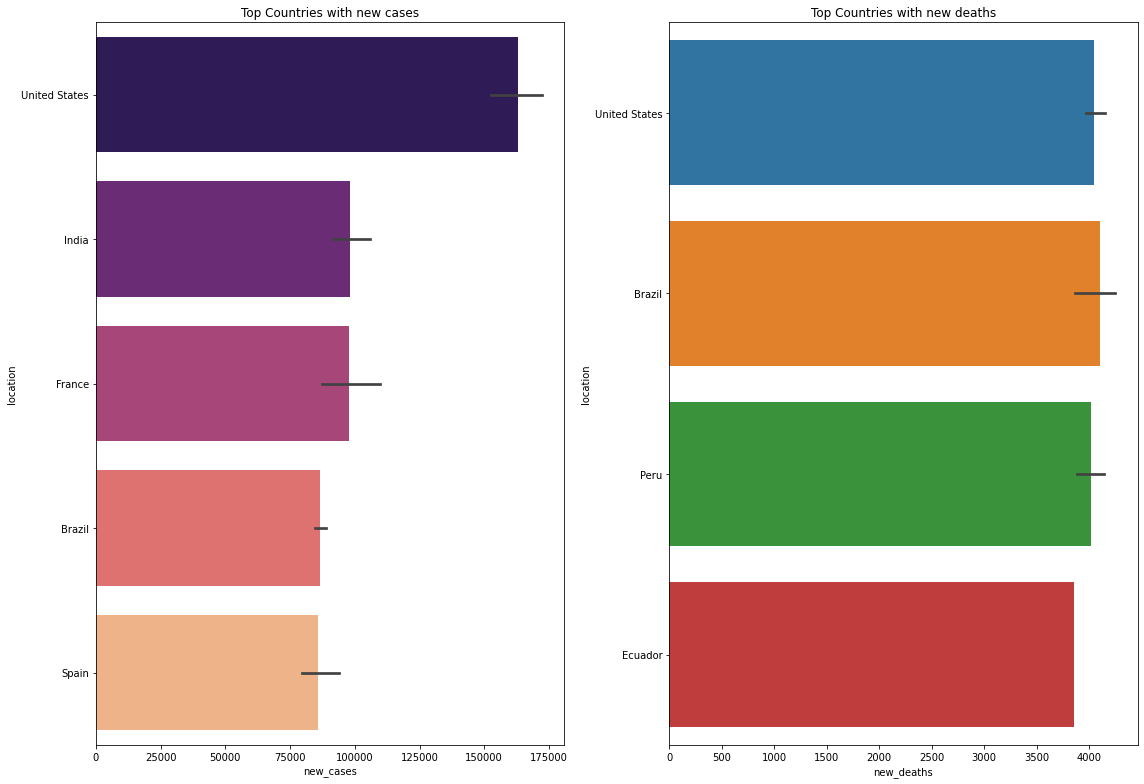

In [ ]:
fig,axes = plt.subplots(figsize=(16,11),nrows =1, ncols = 2)

sns.barplot(x =top_countries_by_new_cases["new_cases"][:200], y =top_countries_by_new_cases["location"][:200],
           ax = axes[0],palette ="magma", orient = "h");
axes[0].set_title("Top Countries with new cases")
sns.barplot(x = top_countries_by_new_deaths["new_deaths"][:20],y = top_countries_by_new_deaths["location"][:20],
           ax =axes[1], orient = "h")
axes[1].set_title("Top Countries with new deaths")
fig.tight_layout()

In [ ]:
df['total_cases'].max()

31345985.0

In [ ]:
#country info which is most affected in terms of total_cases
x=0
for i in df['total_cases']:
  if i == df['total_cases'].max():
    print("continent: "+df['continent'][x])
    print("country: " +df['location'][x])
    print("date: "+df['date'][x]) 
  x = x+1 

continent: North America
country: United States
date: 2021-04-13


In [ ]:
df['total_deaths'].max()

563446.0

In [ ]:
#country info which is most affected in terms of total_deaths
x=0
for i in df['total_deaths']:
  if i == df['total_deaths'].max():
    print("continent: "+df['continent'][x])
    print("country: " +df['location'][x])
    print("date: "+df['date'][x]) 
  x = x+1 

continent: North America
country: United States
date: 2021-04-13


In [ ]:
top_countries_by_total_cases = df.sort_values("total_cases",ascending =False)
top_countries_by_total_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
74133,USA,North America,United States,2021-04-13,31345985.0,77878.0,71233.857,563446.0,823.0,961.143,94700.104,235.279,215.206,1702.240,2.486,2.904,1.020985,58.751708,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74132,USA,North America,United States,2021-04-12,31268107.0,70230.0,68757.571,562623.0,467.0,963.714,94464.825,212.174,207.725,1699.754,1.411,2.912,1.040000,58.751708,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74131,USA,North America,United States,2021-04-11,31197877.0,46380.0,69821.714,562156.0,283.0,969.571,94252.651,140.120,210.940,1698.343,0.855,2.929,1.050000,58.751708,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74130,USA,North America,United States,2021-04-10,31151497.0,66535.0,68192.000,561873.0,709.0,970.714,94112.531,201.010,206.016,1697.488,2.142,2.933,1.050000,58.751708,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74129,USA,North America,United States,2021-04-09,31084962.0,82698.0,67696.571,561164.0,872.0,971.857,93911.521,249.841,204.520,1695.346,2.634,2.936,1.060000,58.751708,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926


In [ ]:
top_countries_by_total_deaths = df.sort_values("total_deaths",ascending =False)
top_countries_by_total_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
74133,USA,North America,United States,2021-04-13,31345985.0,77878.0,71233.857,563446.0,823.0,961.143,94700.104,235.279,215.206,1702.240,2.486,2.904,1.020985,58.751708,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74132,USA,North America,United States,2021-04-12,31268107.0,70230.0,68757.571,562623.0,467.0,963.714,94464.825,212.174,207.725,1699.754,1.411,2.912,1.040000,58.751708,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74131,USA,North America,United States,2021-04-11,31197877.0,46380.0,69821.714,562156.0,283.0,969.571,94252.651,140.120,210.940,1698.343,0.855,2.929,1.050000,58.751708,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74130,USA,North America,United States,2021-04-10,31151497.0,66535.0,68192.000,561873.0,709.0,970.714,94112.531,201.010,206.016,1697.488,2.142,2.933,1.050000,58.751708,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926
74129,USA,North America,United States,2021-04-09,31084962.0,82698.0,67696.571,561164.0,872.0,971.857,93911.521,249.841,204.520,1695.346,2.634,2.936,1.060000,58.751708,331002647.0,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,0.926


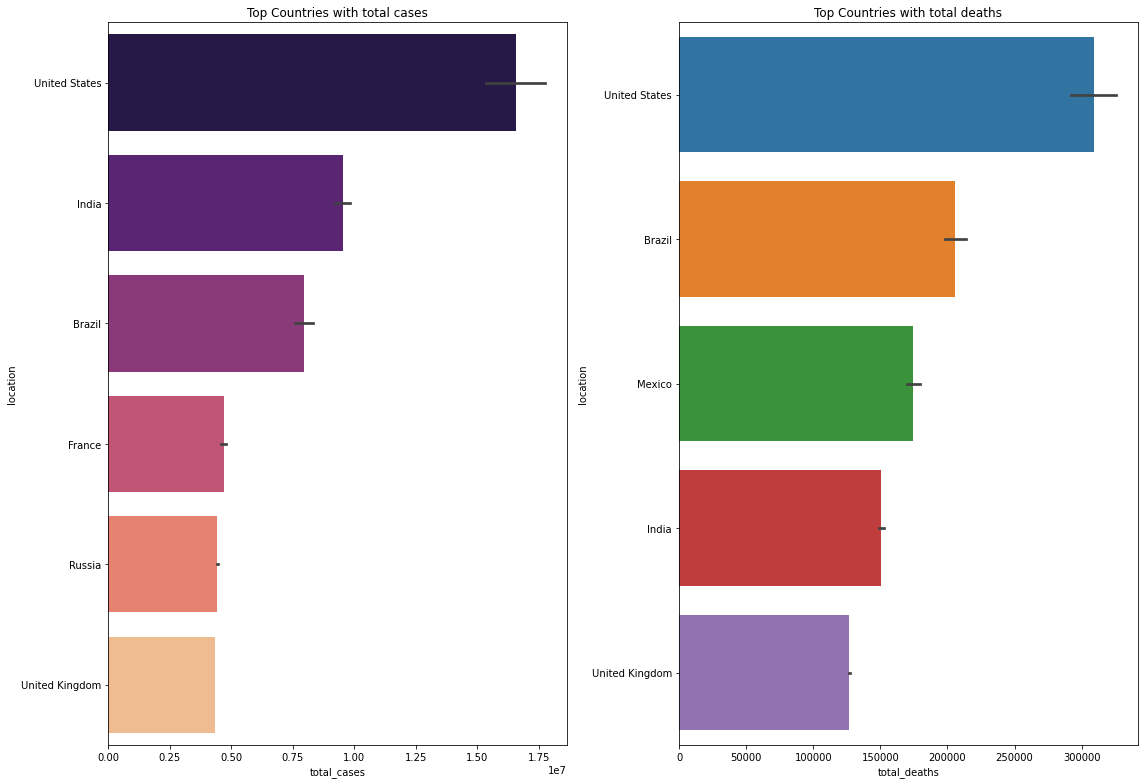

In [ ]:
fig,axes = plt.subplots(figsize=(16,11),nrows =1, ncols = 2)

sns.barplot(x =top_countries_by_total_cases["total_cases"][:800], y =top_countries_by_total_cases["location"][:800],
           ax = axes[0],palette ="magma", orient = "h");
axes[0].set_title("Top Countries with total cases")
sns.barplot(x = top_countries_by_total_deaths["total_deaths"][:800],y = top_countries_by_total_deaths["location"][:800],
           ax =axes[1], orient = "h")
axes[1].set_title("Top Countries with total deaths")
fig.tight_layout()

In [ ]:
df['new_cases'].min()

-74347.0

In [ ]:
#country info which is least affected in terms of new_cases
x=0
for i in df['new_cases']:
  if i == df['new_cases'].min():
    print("continent: "+df['continent'][x])
    print("country: " +df['location'][x])
    print("date: "+df['date'][x]) 
  x = x+1

continent: Europe
country: Spain
date: 2021-03-02


In [ ]:
df['new_deaths'].min()

-1918.0

In [ ]:
#country info which is least affected in terms of new_deaths
x=0
for i in df['new_deaths']:
  if i == df['new_deaths'].min():
    print("continent: "+df['continent'][x])
    print("country: " +df['location'][x])
    print("date: "+df['date'][x]) 
  x = x+1

continent: Europe
country: Spain
date: 2020-05-25


In [ ]:
bottom_countries_by_new_cases = df.sort_values("new_cases",ascending =True)
bottom_countries_by_new_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
65761,ESP,Europe,Spain,2021-03-02,3130184.0,-74347.0,-4464.000,69801.0,192.0,246.000,66948.958,-1590.147,-95.477,1492.917,4.107,5.261,0.76,68.52,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,27.4,31.4,2.97,83.56,0.904
25126,FRA,Europe,France,2020-11-04,1593159.0,-46076.0,44278.714,38734.0,-31.0,415.429,23378.035,-676.120,649.746,568.383,-0.455,6.096,1.24,78.70,68147687.0,122.578,42.0,19.718,13.079,38605.671,86.060,4.77,30.1,35.6,5.98,82.66,0.901
24912,FRA,Europe,France,2020-04-04,47378.0,-17074.0,1383.714,7562.0,1053.0,749.714,695.225,-250.544,20.305,110.965,15.452,11.001,1.27,87.96,68147687.0,122.578,42.0,19.718,13.079,38605.671,86.060,4.77,30.1,35.6,5.98,82.66,0.901
65449,ESP,Europe,Spain,2020-04-24,202990.0,-10034.0,1735.857,22524.0,367.0,360.286,4341.588,-214.609,37.127,481.748,7.849,7.706,0.71,85.19,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,27.4,31.4,2.97,83.56,0.904
20799,ECU,South America,Ecuador,2020-09-07,110092.0,-7953.0,-525.000,10576.0,3852.0,574.286,6239.961,-450.772,-29.757,599.443,218.329,32.550,1.08,73.61,17643060.0,66.939,28.1,7.104,4.458,10581.936,140.448,5.55,2.0,12.3,1.50,77.01,0.759


In [ ]:
bottom_countries_by_new_deaths = df.sort_values("new_deaths",ascending =True)
bottom_countries_by_new_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
65480,ESP,Europe,Spain,2020-05-25,235400.0,-372.0,542.000,26834.0,-1918.0,-125.000,5034.779,-7.956,11.592,573.931,-41.023,-2.674,0.85,75.46,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,27.4,31.4,2.97,83.56,0.904
37845,KGZ,Asia,Kyrgyzstan,2020-08-21,42703.0,196.0,190.000,1055.0,-443.0,-62.286,6545.333,30.042,29.122,161.706,-67.901,-9.547,0.64,79.17,6524191.0,32.333,26.3,4.489,2.882,3393.474,436.362,7.11,3.6,50.5,4.50,71.45,0.697
67104,SWE,Europe,Sweden,2020-04-04,6832.0,357.0,452.714,373.0,-232.0,19.143,676.485,35.349,44.826,36.933,-22.972,1.895,1.41,64.81,10099270.0,24.718,41.0,19.985,13.433,46949.283,133.982,4.79,18.8,18.9,2.22,82.80,0.945
24957,FRA,Europe,France,2020-05-19,182648.0,501.0,453.714,28025.0,-217.0,147.286,2680.179,7.352,6.658,411.239,-3.184,2.161,0.79,76.85,68147687.0,122.578,42.0,19.718,13.079,38605.671,86.060,4.77,30.1,35.6,5.98,82.66,0.901
6875,BEL,Europe,Belgium,2020-08-26,83030.0,583.0,507.286,9879.0,-117.0,-12.857,7164.172,50.304,43.771,852.401,-10.095,-1.109,0.94,58.33,11589616.0,375.564,41.8,18.571,12.849,42658.576,114.898,4.29,25.1,31.4,5.64,81.63,0.931


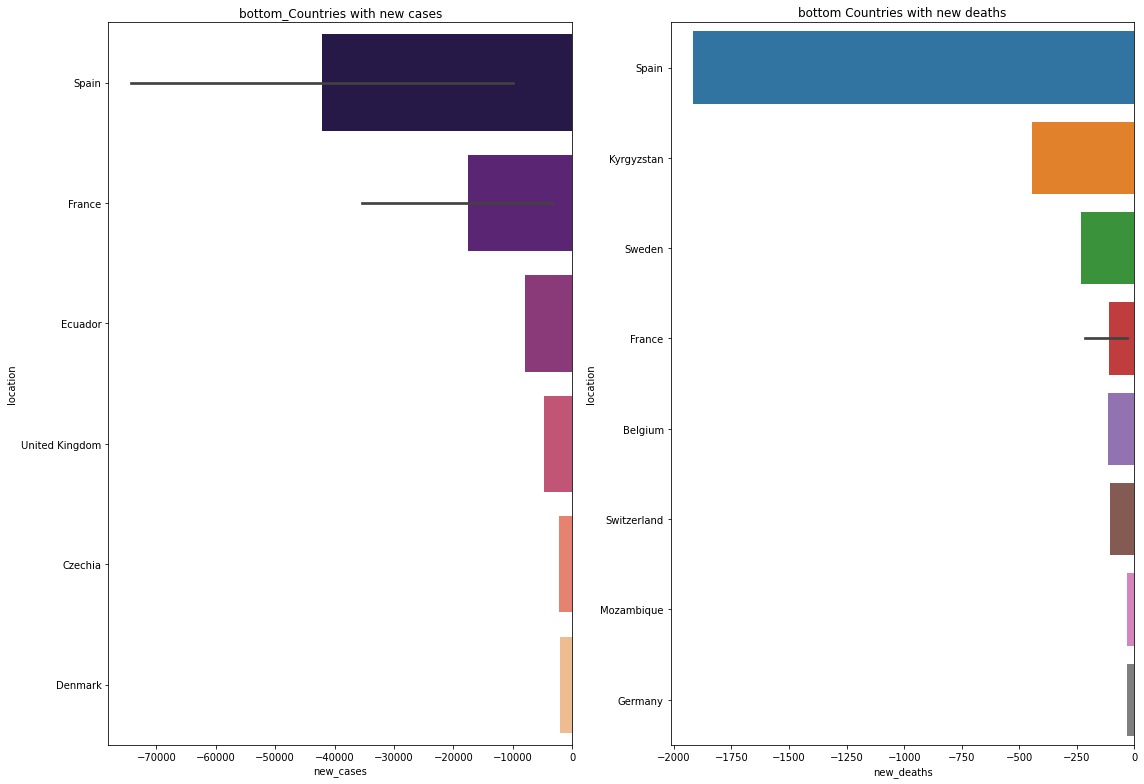

In [ ]:
fig,axes = plt.subplots(figsize=(16,11),nrows =1, ncols = 2)

sns.barplot(x =bottom_countries_by_new_cases["new_cases"][:10], y =bottom_countries_by_new_cases["location"][:10],
           ax = axes[0],palette ="magma", orient = "h");
axes[0].set_title("bottom_Countries with new cases")
sns.barplot(x = bottom_countries_by_new_deaths["new_deaths"][:10],y = bottom_countries_by_new_deaths["location"][:10],
           ax =axes[1], orient = "h")
axes[1].set_title("bottom Countries with new deaths")
fig.tight_layout()

In [ ]:
bottom_countries_by_total_cases = df.sort_values("total_cases",ascending =True)
bottom_countries_by_total_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
35625,JEY,Europe,Jersey,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,9174.97402,72.013701,71.90761,205.336276,1.454894,1.273915,1.020985,58.751708,101073.0,345.570824,30.527255,8.779619,5.563318,19159.755514,257.705034,7.804266,10.558876,32.639829,3.033374,73.163511,0.72733
35630,JEY,Europe,Jersey,2021-02-27,0.0,0.0,0.0,0.0,0.0,0.0,9174.97402,72.013701,71.90761,205.336276,1.454894,1.273915,1.020985,58.751708,101073.0,345.570824,30.527255,8.779619,5.563318,19159.755514,257.705034,7.804266,10.558876,32.639829,3.033374,73.163511,0.72733
35631,JEY,Europe,Jersey,2021-02-28,0.0,0.0,0.0,0.0,0.0,0.0,9174.97402,72.013701,71.90761,205.336276,1.454894,1.273915,1.020985,58.751708,101073.0,345.570824,30.527255,8.779619,5.563318,19159.755514,257.705034,7.804266,10.558876,32.639829,3.033374,73.163511,0.72733
35632,JEY,Europe,Jersey,2021-03-01,0.0,0.0,0.0,0.0,0.0,0.0,9174.97402,72.013701,71.90761,205.336276,1.454894,1.273915,1.020985,58.751708,101073.0,345.570824,30.527255,8.779619,5.563318,19159.755514,257.705034,7.804266,10.558876,32.639829,3.033374,73.163511,0.72733
35633,JEY,Europe,Jersey,2021-03-02,0.0,0.0,0.0,0.0,0.0,0.0,9174.97402,72.013701,71.90761,205.336276,1.454894,1.273915,1.020985,58.751708,101073.0,345.570824,30.527255,8.779619,5.563318,19159.755514,257.705034,7.804266,10.558876,32.639829,3.033374,73.163511,0.72733


In [ ]:
bottom_countries_by_total_deaths = df.sort_values("total_deaths",ascending =True)
bottom_countries_by_total_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.0,0.026,0.026,71.90761,205.336276,1.454894,1.273915,1.020985,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987000,597.029,9.59,10.558876,32.639829,0.5,64.83,0.51100
63731,SOM,Africa,Somalia,2020-03-30,3.0,0.0,0.286,0.0,0.0,0.0,0.189,0.000,0.01800,205.336276,1.454894,0.000000,1.020985,52.78,15893219.0,23.500,16.8,2.731,1.496,19159.755514,365.769,6.05,10.558876,32.639829,0.9,57.40,0.72733
63730,SOM,Africa,Somalia,2020-03-29,3.0,0.0,0.286,0.0,0.0,0.0,0.189,0.000,0.01800,205.336276,1.454894,0.000000,1.020985,52.78,15893219.0,23.500,16.8,2.731,1.496,19159.755514,365.769,6.05,10.558876,32.639829,0.9,57.40,0.72733
63729,SOM,Africa,Somalia,2020-03-28,3.0,0.0,0.286,0.0,0.0,0.0,0.189,0.000,0.01800,205.336276,1.454894,0.000000,1.020985,52.78,15893219.0,23.500,16.8,2.731,1.496,19159.755514,365.769,6.05,10.558876,32.639829,0.9,57.40,0.72733
63728,SOM,Africa,Somalia,2020-03-27,3.0,1.0,0.286,0.0,0.0,0.0,0.189,0.063,0.01800,205.336276,1.454894,0.000000,1.020985,52.78,15893219.0,23.500,16.8,2.731,1.496,19159.755514,365.769,6.05,10.558876,32.639829,0.9,57.40,0.72733


### Plotting Graphs (Data Visualization)

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
from datetime import datetime, timedelta

In [ ]:
#dynamic bar graph for united state and india

In [ ]:
def dynamic_bar_country(df, country, count_hist=10, shift=50, count_ma=20):

  data = df[df['location'] == country].iloc[:, 3:10]
  data.set_index(pd.DatetimeIndex(data['date']), inplace=True)
  data['ExpMA'] = data['new_cases'].ewm(span=count_ma, adjust=False).mean()

  listOfFrames = []

  for j, i in enumerate(pd.date_range(data.index[0], data.index[-count_hist])):

    v = pd.date_range(i, periods=count_hist).to_series()

    d1 = data.loc[v, 'new_cases']
    d2 = data.loc[v, 'new_deaths']
    d3 = data.loc[v, 'ExpMA']

    data1 = go.Bar(x=v, y=d1, name='Infected', 
                    marker_color=[f'rgb{k + shift, shift, shift}' for k in range(j, j + count_hist)],
                    hoverinfo="none", textposition="outside", texttemplate="%{y:s}", cliponaxis=False)

    data2 = go.Bar(x=v, y=d2, name='Died', 
                    marker_color=[f'rgb{shift, k + shift, shift}' for k in range(j, j + count_hist)],
                    hoverinfo="none", textposition="outside", texttemplate="%{y:s}", cliponaxis=False)
    
    data3 = go.Scatter(x=v, y=d3, name='Exp MA', mode="lines")

    layout = go.Layout(font={"size": 14}, height=400, width=600,
                        barmode='group', bargap=0.15, bargroupgap=0.1,
                        xaxis={"showline": True, "tickangle": 30, "visible": True, "linewidth": 2, "linecolor": 'black'},
                        yaxis={"showline": True, "tickangle": 30, "visible": True, "linewidth": 2, "linecolor": 'black'},
                        title=str(datetime.strptime(str(v[-1]), '%Y-%m-%d %H:%M:%S').date()))

    listOfFrames.append(go.Frame(data=[data1, data2, data3], layout=layout))

  d1 = go.Bar(x=data.index, y=data['new_cases'], name='Infected', 
              marker={'color': data['new_cases'], 'colorscale': 'Viridis'}, hoverinfo="none", 
              textposition="outside", texttemplate="%{y:s}", cliponaxis=False)
  
  d2 = go.Bar(x=data.index, y=data['new_deaths'], name='Died',
              marker={'color': data['new_deaths'], 'colorscale': 'Magma'}, hoverinfo="none", 
              textposition="outside", texttemplate="%{y:s}", cliponaxis=False)
  
  d3 = go.Scatter(x=data.index, y=data['ExpMA'], name='Exp MA', mode="lines")

  layout = go.Layout(title=f'Covid in {country}', font={"size": 16}, height=400, width=600,
                      barmode='group', bargap=0.15, bargroupgap=0.1,
                      xaxis={"showline": True, "tickangle": 30, "visible": True, "linewidth": 2, "linecolor": 'black'},
                      yaxis={"showline": True, "tickangle": 30, "visible": True, "linewidth": 2, "linecolor": 'black'},
                      updatemenus=[dict(type="buttons",
                                        buttons=[dict(label="►", method="animate", args=[None, {"fromcurrent": True}]),
                                                dict(label="❚❚", method="animate", args=[[None], {"frame": {"duration": 200, "redraw": False}, 
                                                                      "mode": 'immediate', "transition": {"duration": 200}}])])])
  fig = go.Figure(data=[d1, d2, d3], layout=layout, frames=listOfFrames)

  return fig

In [ ]:
fig1 = dynamic_bar_country(df, 'United States')
fig1.show()

In [ ]:
fig2 = dynamic_bar_country(df, 'India')
fig2.show()

In [ ]:
# create group as country India
grouped = df.groupby(df.location)
df_india = grouped.get_group('India')
df_india

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
31711,IND,Asia,India,2020-01-30,1.0,1.0,0.000,0.0,0.0,0.000,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.190000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
31712,IND,Asia,India,2020-01-31,1.0,0.0,0.000,0.0,0.0,0.000,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.190000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
31713,IND,Asia,India,2020-02-01,1.0,0.0,0.000,0.0,0.0,0.000,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.190000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
31714,IND,Asia,India,2020-02-02,2.0,1.0,0.000,0.0,0.0,0.000,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.190000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
31715,IND,Asia,India,2020-02-03,3.0,1.0,0.000,0.0,0.0,0.000,0.002,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.190000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32146,IND,Asia,India,2021-04-09,13205926.0,145384.0,116238.000,168436.0,794.0,618.000,9569.481,105.350,84.23000,122.055000,0.575000,0.448000,1.470000,69.910000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
32147,IND,Asia,India,2021-04-10,13358805.0,152879.0,124756.571,169275.0,839.0,664.571,9680.263,110.782,90.40300,122.663000,0.608000,0.482000,1.470000,69.910000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
32148,IND,Asia,India,2021-04-11,13527717.0,168912.0,134092.857,170179.0,904.0,725.429,9802.662,122.400,97.16800,123.318000,0.655000,0.526000,1.470000,69.910000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
32149,IND,Asia,India,2021-04-12,13689453.0,161736.0,143343.429,171058.0,879.0,787.286,9919.862,117.200,103.87200,123.955000,0.637000,0.570000,1.480000,69.910000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645


In [ ]:
df_india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
31711,IND,Asia,India,2020-01-30,1.0,1.0,0.0,0.0,0.0,0.0,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
31712,IND,Asia,India,2020-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
31713,IND,Asia,India,2020-02-01,1.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
31714,IND,Asia,India,2020-02-02,2.0,1.0,0.0,0.0,0.0,0.0,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
31715,IND,Asia,India,2020-02-03,3.0,1.0,0.0,0.0,0.0,0.0,0.002,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645


In [ ]:
df_india = df_india.reset_index()

In [ ]:
df_india.drop(columns= 'index', inplace=True)

In [ ]:
df_india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,IND,Asia,India,2020-01-30,1.0,1.0,0.0,0.0,0.0,0.0,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
1,IND,Asia,India,2020-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
2,IND,Asia,India,2020-02-01,1.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
3,IND,Asia,India,2020-02-02,2.0,1.0,0.0,0.0,0.0,0.0,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645
4,IND,Asia,India,2020-02-03,3.0,1.0,0.0,0.0,0.0,0.0,0.002,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645


In [ ]:
# change column name and datatype
df_india = df_india.rename(columns={'new_cases_smoothed':'recovered_cases'})
df_india['recovered_cases'] = df_india['recovered_cases'].astype(int)
df_india['new_deaths'] = df_india['new_deaths'].astype(int)

In [ ]:
# create active case column
df_india['active_cases'] = df_india.apply(lambda row: row.new_cases - row.recovered_cases - row.new_deaths, axis=1)
df_india.head()

,iso_code,continent,location,date,total_cases,new_cases,recovered_cases,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,active_cases
0,IND,Asia,India,2020-01-30,1.0,1.0,0,0.0,0,0.0,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,1.0
1,IND,Asia,India,2020-01-31,1.0,0.0,0,0.0,0,0.0,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0
2,IND,Asia,India,2020-02-01,1.0,0.0,0,0.0,0,0.0,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0
3,IND,Asia,India,2020-02-02,2.0,1.0,0,0.0,0,0.0,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,1.0
4,IND,Asia,India,2020-02-03,3.0,1.0,0,0.0,0,0.0,0.002,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,1.0


In [ ]:
# if active case value is negative then make it zero
x=0
for i in df_india['active_cases']:
  if i<0:
    df_india['active_cases'][x]= 0
  x=x+1

In [ ]:
df_india.head(10)

,iso_code,continent,location,date,total_cases,new_cases,recovered_cases,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,active_cases
0,IND,Asia,India,2020-01-30,1.0,1.0,0,0.0,0,0.0,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,1.0
1,IND,Asia,India,2020-01-31,1.0,0.0,0,0.0,0,0.0,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0
2,IND,Asia,India,2020-02-01,1.0,0.0,0,0.0,0,0.0,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0
3,IND,Asia,India,2020-02-02,2.0,1.0,0,0.0,0,0.0,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,1.0
4,IND,Asia,India,2020-02-03,3.0,1.0,0,0.0,0,0.0,0.002,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,1.0
5,IND,Asia,India,2020-02-04,3.0,0.0,0,0.0,0,0.0,0.002,0.000,0.00000,205.336276,1.454894,0.000000,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0
6,IND,Asia,India,2020-02-05,3.0,0.0,0,0.0,0,0.0,0.002,0.000,0.00000,205.336276,1.454894,0.000000,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0
7,IND,Asia,India,2020-02-06,3.0,0.0,0,0.0,0,0.0,0.002,0.000,0.00000,205.336276,1.454894,0.000000,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0
8,IND,Asia,India,2020-02-07,3.0,0.0,0,0.0,0,0.0,0.002,0.000,0.00000,205.336276,1.454894,0.000000,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0
9,IND,Asia,India,2020-02-08,3.0,0.0,0,0.0,0,0.0,0.002,0.000,0.00000,205.336276,1.454894,0.000000,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0


In [ ]:
# first, create derived values
df_india.loc[0,'total_active_cases'] = df_india.loc[0,'active_cases']
#iterate through remaining rows and fill calculated values
for i in range(1, len(df_india)):
  df_india.loc[i,'total_active_cases'] = df_india.loc[i-1,'total_active_cases'] + df_india.loc[i,'active_cases']

In [ ]:
# first, create derived values
df_india.loc[0,'total_recovered_cases'] = df_india.loc[0,'recovered_cases']
#iterate through remaining rows and fill calculated values
for i in range(1, len(df_india)):
  df_india.loc[i,'total_recovered_cases'] = df_india.loc[i-1,'total_recovered_cases'] + df_india.loc[i,'recovered_cases']

In [ ]:
df_india.head()

,iso_code,continent,location,date,total_cases,new_cases,recovered_cases,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,active_cases,total_active_cases,total_recovered_cases
0,IND,Asia,India,2020-01-30,1.0,1.0,0,0.0,0,0.0,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,1.0,1.0,0.0
1,IND,Asia,India,2020-01-31,1.0,0.0,0,0.0,0,0.0,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0,1.0,0.0
2,IND,Asia,India,2020-02-01,1.0,0.0,0,0.0,0,0.0,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0,1.0,0.0
3,IND,Asia,India,2020-02-02,2.0,1.0,0,0.0,0,0.0,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,1.0,2.0,0.0
4,IND,Asia,India,2020-02-03,3.0,1.0,0,0.0,0,0.0,0.002,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,1.0,3.0,0.0


In [ ]:
new_df_india = pd.DataFrame(df_india)
new_df_india.to_csv('india-covid-data.csv')

In [ ]:
confirmed = df_india.groupby('date').sum()['new_cases'].reset_index()
recovered = df_india.groupby('date').sum()['recovered_cases'].reset_index()
deaths = df_india.groupby('date').sum()['new_deaths'].reset_index()
active = df_india.groupby('date').sum()['active_cases'].reset_index()


In [ ]:
# plot graph for daily basis cases
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['new_cases'], mode='lines+markers',name='confirmed', line=dict(color = 'Orange', width=2)))
fig.add_trace(go.Scatter(x=recovered['date'], y=recovered['recovered_cases'], mode='lines+markers',name='recovered', line=dict(color = 'Green', width=2)))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['new_deaths'], mode='lines+markers',name='deaths', line=dict(color = 'Red', width=2)))
fig.add_trace(go.Scatter(x=active['date'], y=active['active_cases'], mode='lines+markers',name='active', line=dict(color = 'Blue', width=2)))
fig.update_layout(title = 'New Cases in India', xaxis_tickfont_size = 14, yaxis = dict(title = 'Number of New Cases'))

fig.show()

In [ ]:
confirmed = df_india.groupby('date').sum()['total_cases'].reset_index()
recovered = df_india.groupby('date').sum()['total_recovered_cases'].reset_index()
deaths = df_india.groupby('date').sum()['total_deaths'].reset_index()
active = df_india.groupby('date').sum()['total_active_cases'].reset_index()


In [ ]:
# plot graph for total cases
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['total_cases'], mode='lines+markers',name='confirmed', line=dict(color = 'Orange', width=2)))
fig.add_trace(go.Scatter(x=recovered['date'], y=recovered['total_recovered_cases'], mode='lines+markers',name='recovered', line=dict(color = 'Green', width=2)))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['total_deaths'], mode='lines+markers',name='deaths', line=dict(color = 'Red', width=2)))
fig.add_trace(go.Scatter(x=active['date'], y=active['total_active_cases'], mode='lines+markers',name='active', line=dict(color = 'Blue', width=2)))
fig.update_layout(title = 'Total Cases in India', xaxis_tickfont_size = 14, yaxis = dict(title = 'Number of Total Cases'))

fig.show()

### Forecasting for a month based on previous data for India

In [ ]:
# Renaming the columns of Dataframe
df_india = df_india.rename(columns={'date':'ds', 'new_cases':'y'})

In [ ]:
df_india.head()

,iso_code,continent,location,ds,total_cases,y,recovered_cases,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,active_cases,total_active_cases,total_recovered_cases
0,IND,Asia,India,2020-01-30,1.0,1.0,0,0.0,0,0.0,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,1.0,1.0,0.0
1,IND,Asia,India,2020-01-31,1.0,0.0,0,0.0,0,0.0,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0,1.0,0.0
2,IND,Asia,India,2020-02-01,1.0,0.0,0,0.0,0,0.0,0.001,0.000,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,0.0,1.0,0.0
3,IND,Asia,India,2020-02-02,2.0,1.0,0,0.0,0,0.0,0.001,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,1.0,2.0,0.0
4,IND,Asia,India,2020-02-03,3.0,1.0,0,0.0,0,0.0,0.002,0.001,71.90761,205.336276,1.454894,1.273915,1.020985,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,1.0,3.0,0.0


In [ ]:
# to create new dataframe  with ds and y columns
new_df_india = df_india[['ds', 'y']]
new_df_india.head()

,ds,y
0,2020-01-30,1.0
1,2020-01-31,0.0
2,2020-02-01,0.0
3,2020-02-02,1.0
4,2020-02-03,1.0


In [ ]:
new_df_india.tail()

,ds,y
435,2021-04-09,145384.0
436,2021-04-10,152879.0
437,2021-04-11,168912.0
438,2021-04-12,161736.0
439,2021-04-13,184372.0


In [ ]:
type(new_df_india)

pandas.core.frame.DataFrame

In [ ]:
# to check ds and y are in correct data type
new_df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      440 non-null    object 
 1   y       440 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


In [ ]:
# Converting the columns of dataframe into required formats
# Convert ds to timestamp
# Convert y to int
new_df_india['ds'] = pd.to_datetime(new_df_india['ds'])
new_df_india['y'] = new_df_india['y'].astype(int)
new_df_india.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      440 non-null    datetime64[ns]
 1   y       440 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.0 KB


In [ ]:
new_df_india.tail()

,ds,y
435,2021-04-09,145384
436,2021-04-10,152879
437,2021-04-11,168912
438,2021-04-12,161736
439,2021-04-13,184372


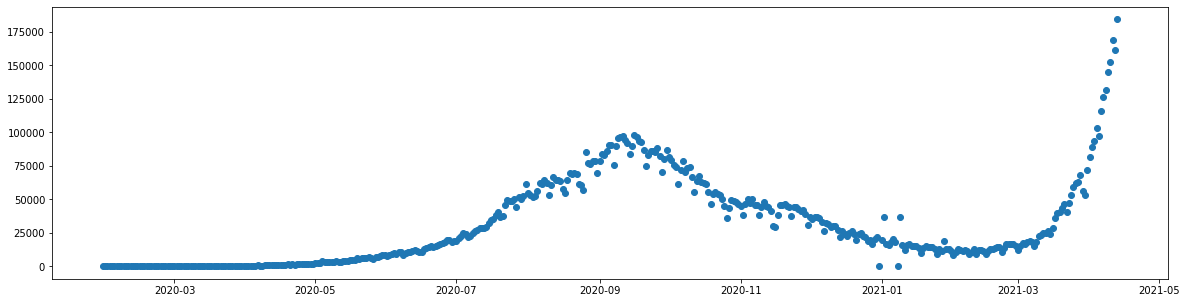

In [ ]:
# plot a graph of Date vs new cases

import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(new_df_india['ds'], new_df_india['y'])
plt.show()

In [ ]:
new_df_india.head()

,ds,y
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1


In [ ]:
new_df_india.tail()

,ds,y
435,2021-04-09,145384
436,2021-04-10,152879
437,2021-04-11,168912
438,2021-04-12,161736
439,2021-04-13,184372


In [ ]:
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=1, daily_seasonality=True, interval_width=0.95, seasonality_mode='multiplicative')
# , daily_seasonality=True, seasonality_prior_scale=0.1, interval_width=0.8, mcmc_samples=300
model.fit(new_df_india)
# before predicting need to write new method because to confirm how much days or months or year we have to predict in short what 
# is timetable we want to predict.
forecast = model.make_future_dataframe(periods=30, freq='D')   # because the data is given as in daily basis so, freq=D
forecast = model.predict(forecast)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
# select only important columns
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,-58.957930,-26492.179543,25330.304599
1,2020-01-31,-57.272106,-22741.395912,25087.936346
2,2020-02-01,-54.788798,-24840.529016,25981.955268
3,2020-02-02,-50.784512,-23477.425472,25403.658406
4,2020-02-03,-42.437813,-25307.662219,26013.629486


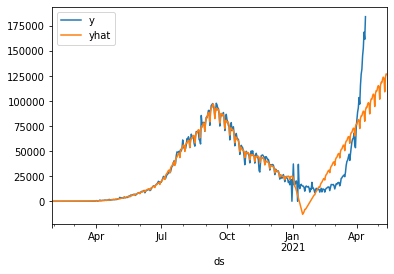

In [ ]:
# to plot graph between actual values and predicted values
pd.concat([new_df_india.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis=1).plot()

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,-58.957930,-26492.179543,25330.304599
1,2020-01-31,-57.272106,-22741.395912,25087.936346
2,2020-02-01,-54.788798,-24840.529016,25981.955268
3,2020-02-02,-50.784512,-23477.425472,25403.658406
4,2020-02-03,-42.437813,-25307.662219,26013.629486


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
465,2021-05-09,-15220.657361,86936.744713,162861.276676,-19286.435602,-11279.824825,-8.952139,-8.952139,-8.952139,-9.041742,-9.041742,-9.041742,-0.089603,-0.089603,-0.089603,0.0,0.0,0.0,122400.597823
466,2021-05-10,-15368.189597,73354.247365,148779.764651,-19642.046046,-11208.451852,-8.952139,-8.952139,-8.952139,-8.110430,-8.110430,-8.110430,0.841709,0.841709,0.841709,0.0,0.0,0.0,109274.432757
467,2021-05-11,-15515.721833,83780.564434,167960.200773,-20020.080746,-11137.078878,-8.952139,-8.952139,-8.952139,-8.977732,-8.977732,-8.977732,-0.025593,-0.025593,-0.025593,0.0,0.0,0.0,123780.269880
468,2021-05-12,-15663.254069,84477.081188,172643.827946,-20342.522052,-11045.945252,-8.952139,-8.952139,-8.952139,-9.123332,-9.123332,-9.123332,-0.171194,-0.171194,-0.171194,0.0,0.0,0.0,127237.820770
469,2021-05-13,-15810.786305,82375.898616,171324.969414,-20805.668594,-10966.185404,-8.952139,-8.952139,-8.952139,-9.015723,-9.015723,-9.015723,-0.063584,-0.063584,-0.063584,0.0,0.0,0.0,126734.876029


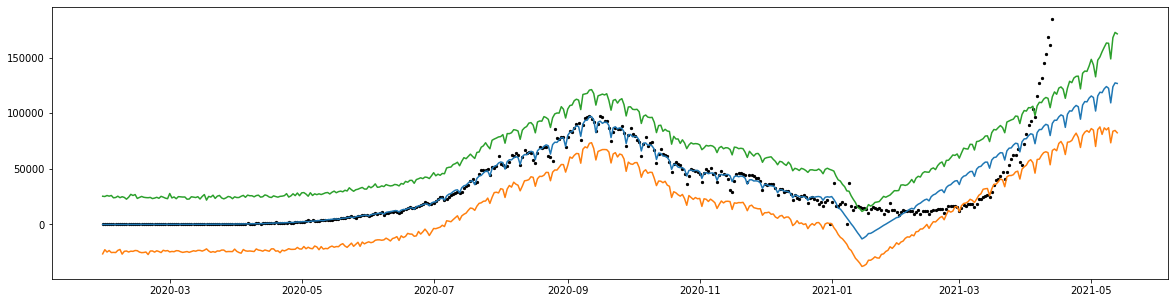

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(new_df_india['ds'], new_df_india['y'], s=5, c='k')
plt.plot(forecast['ds'], forecast['yhat'])
plt.plot(forecast['ds'], forecast['yhat_lower'])
plt.plot(forecast['ds'], forecast['yhat_upper'])
plt.show()

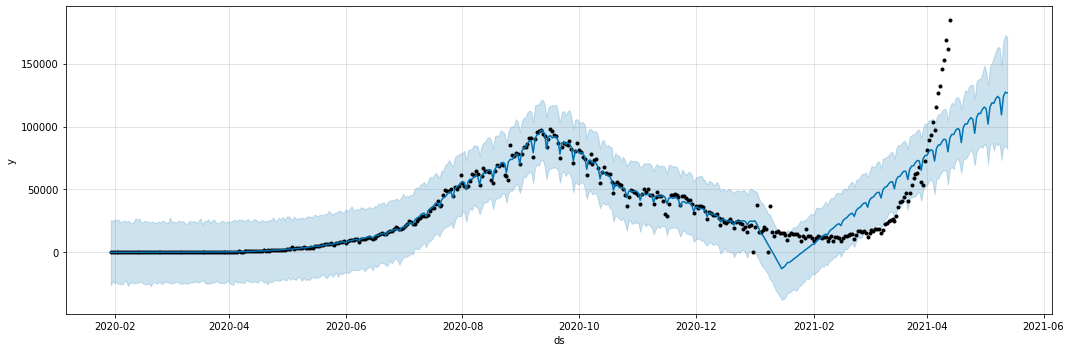

In [ ]:
# Pandas Plotting
model.plot(forecast, figsize=(15,5));

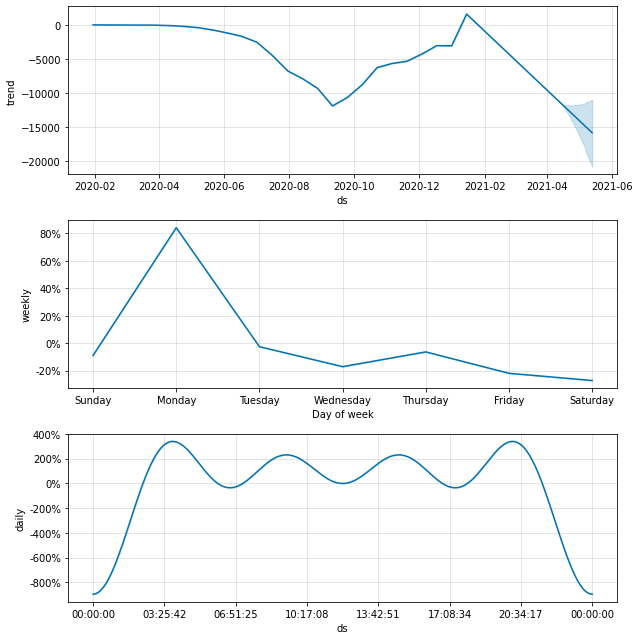

In [ ]:
model.plot_components(forecast);